<a href="https://colab.research.google.com/github/seanb7/GEOL-450/blob/main/Gravitational_Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource

In [33]:
# Create a regional Map with Magnetics
ascname = 'FisherCaldera.asc'
f = open(ascname, 'r')

# Read by Lines
for i, line in enumerate(f):
    if i <7:
      line = line.strip()
      columns = line.split()

      # Read the Head of the file
      if columns [0] == 'ncols':
        ncols = int(columns[1])
      if columns [0] == 'nrows':
        nrows = int(columns[1])
      if columns [0] == 'xllcorner':
        xllcorner = float(columns[1])
      if columns [0] == 'yllcorner':
        yllcorner = float(columns[1])
      if columns [0] == 'cellsize':
        cellsize = float(columns[1])
      if columns [0] == 'nodata_value':
        NODATA_value = float(columns[1])

# Create X,Y Mesh
x = cellsize * np.arange (ncols) + xllcorner
y = cellsize * np.arange (nrows) + yllcorner

# Read by Lines
datamat = np.genfromtxt(ascname, skip_header=6, dtype = float)

# Substitute the nodata value
datamat[datamat == NODATA_value] = 'nan'

In [34]:
# Read Gravitational Data
data = pd.read_csv('FisherGravPts.csv')
data.head()

,Station,lon,lat,z_m,gl,Season_1,Season_2,Season_3
0,F1,-164.5000,54.5800,77,9.814714,981456.68226,981456.83744,981456.95964
1,T1,-164.4800,54.5800,162,9.814714,981439.96971,981440.17970,981440.34510
2,T2,-164.4750,54.5900,180,9.814723,981437.61795,981437.91138,981438.14258
3,T3,-164.4531,54.5987,201,9.814730,981434.66674,981435.09317,981435.42927
4,T4,-164.4400,54.6000,222,9.814731,981431.47935,981432.12969,981432.64229


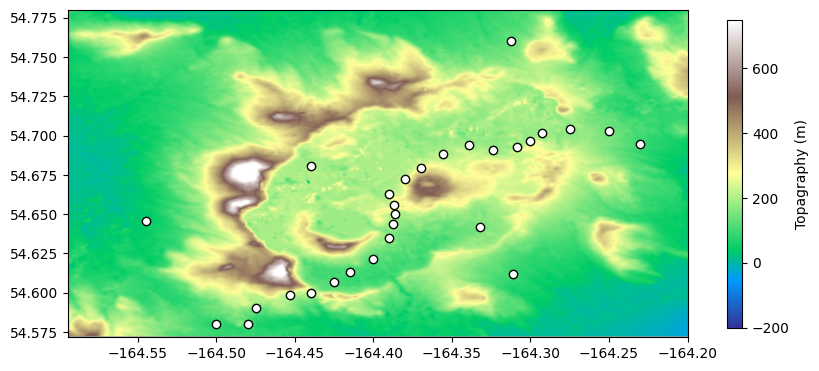

In [10]:
# Plot Map of Survey Locations
fig, axl = plt.subplots()
cs = plt.imshow(datamat,
                extent = [x.min(), x.max(), y.min(), y.max()],
                cmap = "terrain", vmin = -200, vmax = 750)
plt.plot(data.lon, data.lat, 'ko', markerfacecolor = 'w')
fig = plt.gcf()
fig.set_size_inches (10,8)
cbar = fig.colorbar(cs, shrink = 0.5, ax =axl)
cbar.set_label('Topagraphy (m)')
plt.show()
fig.savefig('FisherGravPts.png')

In [35]:
# Calculate the FAA (Free Air Anomaly) Correction
# Radius of the Earth
R = 6371*1e3

# FAA Correction corrects for both the Latitude and the Distance from the Center of the Mass
delf = data.gl*(1 - ((2*data.z_m)/R))

# Convert delf to mgals
delf_mgal = delf*1e5

In [36]:
# Step 2b Calculate the FAA
gfaa_1 = data.Season_1 - delf_mgal
gfaa_2 = data.Season_2 - delf_mgal
gfaa_3 = data.Season_3 - delf_mgal

In [37]:
# Step 2c plot the gFAA along a transect
x = np.zeros(23)

# Only point along the transect first point is Zero
i = 1
for elm in data.lon:
  x[i] = x[i-1] + (np.sqrt((data.lon[i]-data.lon[i-1])**2 + (data.lat[i]-data.lat[i-1])**2)) * 111
  if i < 22:
    i = i + 1

x[0] = 0

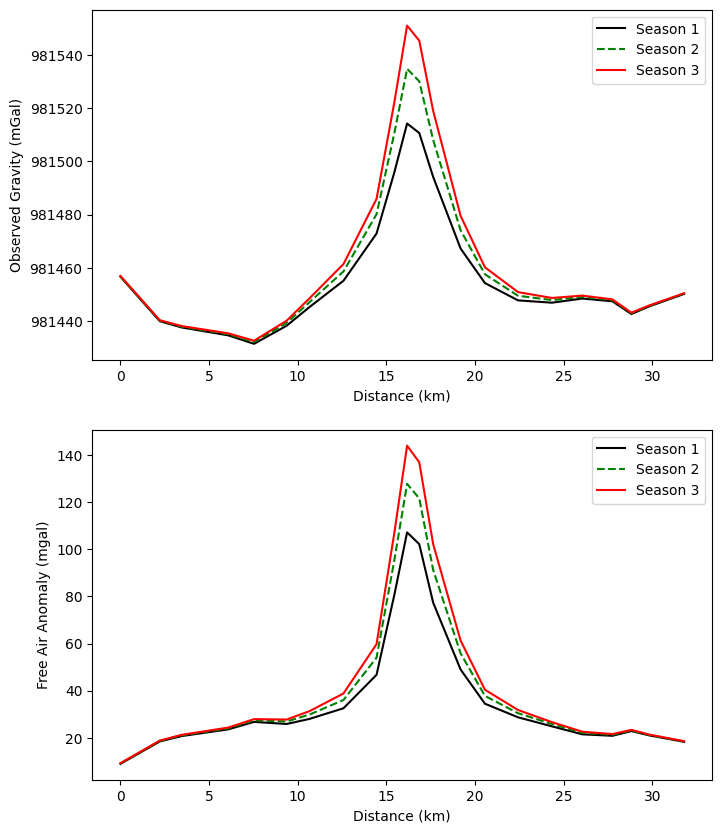

In [38]:
# Plot gFAA along Caludera
fig, ax = plt.subplots(2, 1, figsize = ( 8, 10))
plt.subplot(211)
plt.plot(x[0:22], data.Season_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], data.Season_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], data.Season_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Observed Gravity (mGal)')
plt.legend()

plt.subplot(212)
plt.plot(x[0:22], gfaa_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], gfaa_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], gfaa_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Free Air Anomaly (mgal)')
plt.legend()
plt.show()

In [148]:
# Calculate the Bouguer Correction (Mass associated with Elevation)
# Assuming a standard density of 2700 kg/m^3 for the Bouguer correction
h = 3e3 # 3km Depth
G = 6.67e-11
p = 2700 # kg/m^3
density = 2.7

def bouguer_correction_numpy(density, height):
    G = 6.67430e-11  # Gravitational constant in m^3 kg^-1 s^-2
    correction = 2 * np.pi * G * density * height
    return correction

gba_1 = data.Season_1 - bouguer_correction_numpy(density, h)
gba_2 = data.Season_2 - bouguer_correction_numpy(density, h)
gba_3 = data.Season_3 - bouguer_correction_numpy(density, h)

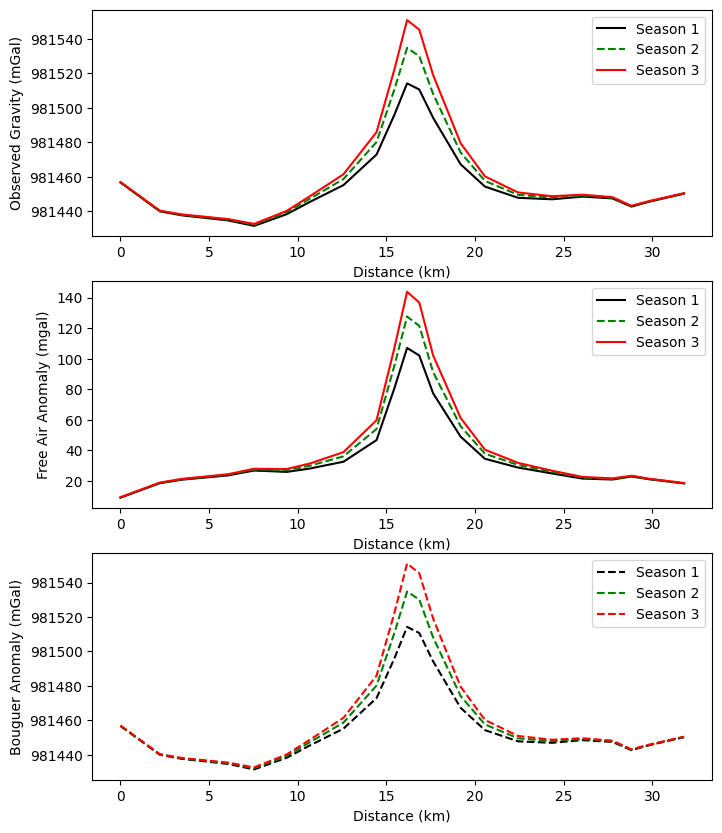

In [151]:
# Plot Bouguer Correction
fig, ax = plt.subplots(3, 1, figsize = (8, 10))
plt.subplot(311)
plt.plot(x[0:22], data.Season_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], data.Season_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], data.Season_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Observed Gravity (mGal)')
plt.legend()

plt.subplot(312)
plt.plot(x[0:22], gfaa_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], gfaa_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], gfaa_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Free Air Anomaly (mgal)')
plt.legend()

plt.subplot(313)
plt.plot(x[0:22], gba_1[0:22], 'k--', label = 'Season 1')
plt.plot(x[0:22], gba_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], gba_3[0:22], 'r--', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Bouguer Anomaly (mGal)')
plt.legend()

# Does your anomaly match any of the Illustrated Free Air or Bouguer anomalies?

  No, none of these match this could be related to how the terrain was formed. This culdera was created by a massive uplift in the earth crust after a eruption event, where most mountain ranges are formed for the crust uplift after plates subduct into one another. Calderas are not a solid mass like mountain ranges, they can be active volcanos with a large magma chamber system.

In [146]:
# Magma Chamber
xx = np.arange(-15, 15, 1.5) * 1e3
G = 6.67e-11
b = 10e3 # 10km radius of magma body
delrho = 200
h = 3e3 # 3km Depth

# Create Gravity Anomaly
delgz = np.zeros(np.size(xx))
i = 0

for elem in xx:
  delgz[i] = (((4*np.pi * G * (b**3) * delrho) / 3) * (h / ((((elem)**2) + h**2)**(3/2)))) * 1e5
  i = i + 1
print(delgz)

[  4.6831914    6.33816481   8.8578546   12.87295088  19.63368999
  31.80496482  55.53246134 105.96852467 219.51132739 444.25969072
 620.87179258 444.25969072 219.51132739 105.96852467  55.53246134
  31.80496482  19.63368999  12.87295088   8.8578546    6.33816481]


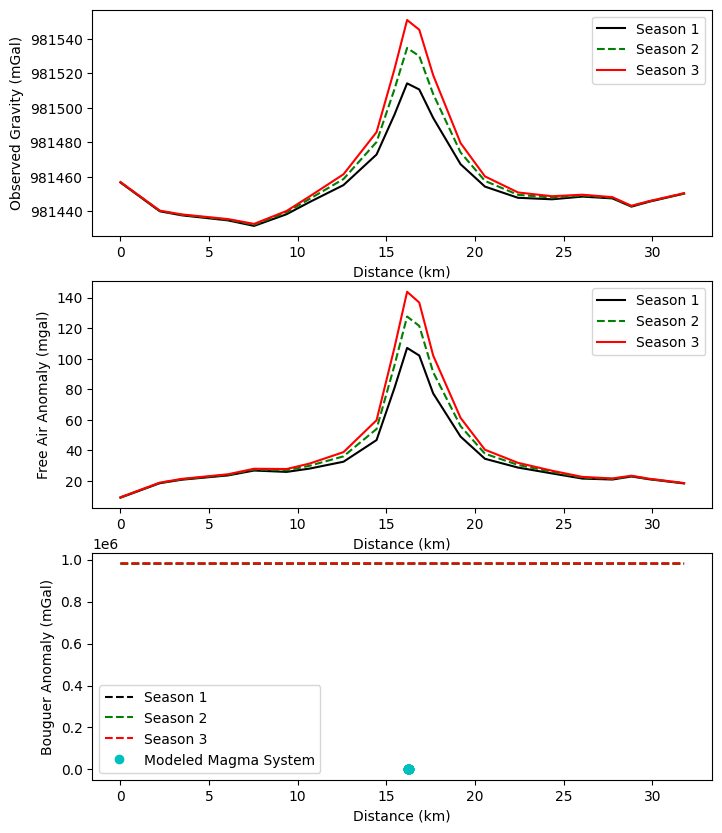

In [152]:
# Plot All Anomalies
fig, ax = plt.subplots(3, 1, figsize = ( 8, 10))
plt.subplot(311)
plt.plot(x[0:22], data.Season_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], data.Season_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], data.Season_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Observed Gravity (mGal)')
plt.legend()

plt.subplot(312)
plt.plot(x[0:22], gfaa_1[0:22], 'k', label = 'Season 1')
plt.plot(x[0:22], gfaa_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], gfaa_3[0:22], 'r', label = 'Season 3')
plt.xlabel('Distance (km)')
plt.ylabel('Free Air Anomaly (mgal)')
plt.legend()


plt.subplot(313)
plt.plot(x[0:22], gba_1[0:22], 'k--', label = 'Season 1')
plt.plot(x[0:22], gba_2[0:22], 'g--', label = 'Season 2')
plt.plot(x[0:22], gba_3[0:22], 'r--', label = 'Season 3')
plt.plot(xx / 1e6 + 16.25, delgz, 'co', label = 'Modeled Magma System')
plt.xlabel('Distance (km)')
plt.ylabel('Bouguer Anomaly (mGal)')
plt.legend()